# Project Title: Classification Problem Analysis


## Table of Contents
1. [Introduction](#introduction)
2. [Importing Libraries and Dataset](#importing-libraries-and-dataset)
    - 2.1 [Import Necessary Libraries](#import-necessary-libraries)
    - 2.2 [Load the Dataset](#load-the-dataset)
3. [Data Exploration](#data-exploration)
    - 3.1 [Understanding the Dataset Structure](#understanding-the-dataset-structure)
    - 3.2 [Descriptive Statistics](#descriptive-statistics)
    - 3.3 [Checking for Incoherencies](#checking-for-incoherencies)
    - 3.4 [Univariate Analysis](#univariate-analysis)
    - 3.5 [Multivariate Analysis](#multivariate-analysis)
4. [Data Cleaning and Pre-processing](#data-cleaning-and-pre-processing)
    - 4.1 [Handling Missing Values](#handling-missing-values)
    - 4.2 [Outlier Detection and Treatment](#outlier-detection-and-treatment)
    - 4.3 [Dealing with Categorical Variables](#dealing-with-categorical-variables)
    - 4.4 [Feature Engineering](#feature-engineering)
        - 4.4.1 [Feature Creation](#feature-creation)
        - 4.4.2 [Feature Transformation](#feature-transformation)
    - 4.5 [Data Scaling and Normalization](#data-scaling-and-normalization)
5. [Feature Selection](#feature-selection)
    - 5.1 [Feature Importance Analysis](#feature-importance-analysis)
    - 5.2 [Correlation Matrix](#correlation-matrix)
    - 5.3 [Dimensionality Reduction Techniques](#dimensionality-reduction-techniques)
    - 5.4 [Final Feature Selection](#final-feature-selection)
6. [Model Building](#model-building)
    - 6.1 [Problem Type Identification](#problem-type-identification)
    - 6.2 [Algorithm Selection](#algorithm-selection)
    - 6.3 [Model Training](#model-training)
    - 6.4 [Cross-Validation](#cross-validation)
    - 6.5 [Performance Metrics](#performance-metrics)
    - 6.6 [Model Evaluation](#model-evaluation)
7. [Prediction on Test Set](#prediction-on-test-set)
    - 7.1 [Generating Predictions](#generating-predictions)
    - 7.2 [Result Interpretation](#result-interpretation)
8. [Conclusion](#conclusion)
9. [References](#references)
10. [Appendices](#appendices)


<a id='introduction'></a>
## Introduction

- Brief overview of the classification problem.
- Objectives and goals of the analysis.
- Summary of the dataset provided by the client.


<a id='importing-libraries-and-dataset'></a>
## Importing Libraries and Dataset


<a id='import-necessary-libraries'></a>
### 2.1 Import Necessary Libraries

- List all Python libraries required for the analysis.
- Explain the purpose of each library.


In [118]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# etc.


# Encoding and feature selection libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Suppress warnings for clarity
# import warnings
# warnings.filterwarnings('ignore')


 Problems:
- Duplicates?
- Data types?
- Missing values?
- Strange values?
- Descriptive statistics?

Take a closer look and point out possible problems:

(hint: a missing values in pandas is represented with a NaN value)

<a id='load-the-dataset'></a>
### 2.2 Load the Dataset

- Instructions on how to import the dataset into the notebook.
- Description of the dataset's structure (e.g., number of rows and columns).


In [119]:
# Load the dataset
df = pd.read_csv('../project_data/train_data.csv')

/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_66757/1041092869.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../project_data/train_data.csv')


In [120]:
df.head(2).T

,0,1
Accident Date,2019-12-30,2019-08-30
Age at Injury,31.0,46.0
Alternative Dispute Resolution,N,N
Assembly Date,2020-01-01,2020-01-01
Attorney/Representative,N,Y
Average Weekly Wage,0.0,1745.93
Birth Year,1988.0,1973.0
C-2 Date,2019-12-31,2020-01-01
C-3 Date,NaN,2020-01-14
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO


In [121]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

<a id='data-exploration'></a>
## Data Exploration


<a id='understanding-the-dataset-structure'></a>
### 3.1 Understanding the Dataset Structure

- Display the first few rows of the dataset.
- Discuss the data types of each column.
- Identify the target variable and features.


Expected column datatypes(generated with ChatGPT):
| Column Name                          | Expected Data Type  |
|--------------------------------------|---------------------|
| Accident Date                        | datetime            |
| Age at Injury                        | int                 |
| Alternative DisputeResolution        | ?                   |
| Assembly Date                        | datetime            |
| Attorney/Representative              | bool                |
| Average Weekly Wage                  | float               |
| Birth Year                           | int                 |
| C-2 Date                             | datetime            |
| C-3 Date                             | datetime            |
| Carrier Name                         | string              |
| Carrier Type                         | string              |
| Claim Identifier                     | string              |
| County of Injury                     | string              |
| COVID-19 Indicator                   | bool                |
| District Name                        | string              |
| First Hearing Date                   | datetime            |
| Gender                               | string              |
| IME-4 Count                          | int                 |
| Industry Code                        | string              |
| Medical Fee Region                   | string              |
| WCIO Cause of Injury Code            | string              |
| WCIO Nature of Injury Code           | string              |
| WCIO Part Of Body Code               | string              |
| Zip Code                             | string              |
| Agreement Reached                    | bool                |
| WCB Decision                         | category            |
| Claim Injury Type                    | category            |


### Categorical variables 

ALternative Dispute Resolution
Attorney/Representative
Carrier Name

In [122]:
cat_variables = ['Alternative Dispute Resolution',
'Attorney/Representative',
'Carrier Name',
'Carrier Type',
'County of Injury',
'COVID-19 Indicator',
'District Name',
'Gender',
'Industry Code',
'Medical Fee Region',
'WCIO Cause of Injury Code',
'WCIO Nature of Injury Code',
'WCIO Part Of Body Code',
'Zip Code',
'Agreement Reached']



df[cat_variables].head().T

,0,1,2,3,4
Alternative Dispute Resolution,N,N,N,NaN,N
Attorney/Representative,N,Y,N,NaN,N
Carrier Name,NEW HAMPSHIRE INSURANCE CO,ZURICH AMERICAN INSURANCE CO,INDEMNITY INSURANCE CO OF,NaN,STATE INSURANCE FUND
Carrier Type,1A. PRIVATE,1A. PRIVATE,1A. PRIVATE,NaN,2A. SIF
County of Injury,ST. LAWRENCE,WYOMING,ORANGE,NaN,DUTCHESS
COVID-19 Indicator,N,N,N,NaN,N
District Name,SYRACUSE,ROCHESTER,ALBANY,NaN,ALBANY
Gender,M,F,M,NaN,M
Industry Code,44.0,23.0,56.0,NaN,62.0
Medical Fee Region,I,I,II,NaN,II


In [123]:
df[cat_variables].nunique()

Alternative Dispute Resolution        3
Attorney/Representative               2
Carrier Name                       2046
Carrier Type                          8
County of Injury                     63
COVID-19 Indicator                    2
District Name                         8
Gender                                4
Industry Code                        24
Medical Fee Region                    5
WCIO Cause of Injury Code            77
WCIO Nature of Injury Code           56
WCIO Part Of Body Code               57
Zip Code                          10060
Agreement Reached                     2
dtype: int64

In [124]:
df[cat_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  574026 non-null  object 
 1   Attorney/Representative         574026 non-null  object 
 2   Carrier Name                    574026 non-null  object 
 3   Carrier Type                    574026 non-null  object 
 4   County of Injury                574026 non-null  object 
 5   COVID-19 Indicator              574026 non-null  object 
 6   District Name                   574026 non-null  object 
 7   Gender                          574026 non-null  object 
 8   Industry Code                   564068 non-null  float64
 9   Medical Fee Region              574026 non-null  object 
 10  WCIO Cause of Injury Code       558386 non-null  float64
 11  WCIO Nature of Injury Code      558369 non-null  float64
 12  WCIO Part Of Bod

In [125]:
df[cat_variables].describe(include='all')

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached
count,574026,574026,574026,574026,574026,574026,574026,574026,564068.000000,574026,558386.000000,558369.000000,556944.000000,545389,574026.000000
unique,3,2,2046,8,63,2,8,4,NaN,5,NaN,NaN,NaN,10060,NaN
top,N,N,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,M,NaN,IV,NaN,NaN,NaN,11236,NaN
freq,571412,392291,111144,285368,60430,546505,270779,335218,NaN,265981,NaN,NaN,NaN,3302,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.645305,NaN,54.381143,41.013839,39.738146,NaN,0.046665
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.644175,NaN,25.874281,22.207521,22.365940,NaN,0.210921
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,1.000000,1.000000,-9.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,31.000000,16.000000,33.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,NaN,56.000000,49.000000,38.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,75.000000,52.000000,53.000000,NaN,0.000000


In [126]:
# get info about the dataset with the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

Notes about unique values: 
* Age of < 16 does not seem plausible 
* Figure out what Alternative Dispute Resolution means
* WCB Decision only contains one values --> 'Not work related'


In [127]:
# get sum where average weekly wage == 0  
(df['Average Weekly Wage'] == 0).sum()

np.int64(335450)

In [128]:
# check for values of Alternative Dispute Resolution
print('unique values Alternative Dispute Resolution: \n', df['Alternative Dispute Resolution'].unique(), '\n')

# check for values of WCB Decision
print('unique values WCB Decision: \n', df['WCB Decision'].unique(), '\n')

# check for values Claim Injury Type
print('unique values Claim Injury Type: \n', df['Claim Injury Type'].unique(), '\n')

# check for values Gender
print('unique values Gender : \n', df['Gender'].unique(), '\n')

unique values Alternative Dispute Resolution: 
 ['N' nan 'Y' 'U'] 

unique values WCB Decision: 
 ['Not Work Related' nan] 

unique values Claim Injury Type: 
 ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD'] 

unique values Gender : 
 ['M' 'F' nan 'U' 'X'] 



In [129]:
# print out how many missing values there are for each column in percentage 
df.isnull().sum() / df.shape[0]

Accident Date                         0.038981
Age at Injury                         0.032765
Alternative Dispute Resolution        0.032765
Assembly Date                         0.000000
Attorney/Representative               0.032765
Average Weekly Wage                   0.081042
Birth Year                            0.081761
C-2 Date                              0.057299
C-3 Date                              0.684492
Carrier Name                          0.032765
Carrier Type                          0.032765
Claim Identifier                      0.000000
Claim Injury Type                     0.032765
County of Injury                      0.032765
COVID-19 Indicator                    0.032765
District Name                         0.032765
First Hearing Date                    0.745905
Gender                                0.032765
IME-4 Count                           0.776227
Industry Code                         0.049544
Industry Code Description             0.049544
Medical Fee R

<a id='descriptive-statistics'></a>
### 3.2 Descriptive Statistics

- Calculate summary statistics (mean, median, mode, etc.).
- Analyze the distribution of numerical features.


In [130]:
# check descriptive statistics again
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [131]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


<a id='checking-for-incoherencies'></a>
### 3.3 Checking for Incoherencies

- Identify any inconsistencies or anomalies in the data.
- Discuss potential data entry errors or irregularities.


In [132]:
# create a dictionary with WCIO Cause of Injury Code and Description. WCIO Nature of Injury Code and Description, WCIO Part of Body Code and Description, Industry Code and Description
C_o_In_indicators = df[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',]].drop_duplicates().set_index('WCIO Cause of Injury Code').sort_index()
N_o_In_indicators = df[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',]].drop_duplicates().set_index('WCIO Nature of Injury Code').sort_index()
P_o_B_indicators = df[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates().set_index('WCIO Part Of Body Code').sort_index()
Ind_indicators = df[['Industry Code', 'Industry Code Description',]].drop_duplicates().set_index('Industry Code').sort_index()

# print each df 
C_o_In_indicators
N_o_In_indicators
P_o_B_indicators
Ind_indicators

# check whether there are codes two times and print it with the len of the df
print(len(C_o_In_indicators[C_o_In_indicators.index.duplicated()]))
print(len(N_o_In_indicators[N_o_In_indicators.index.duplicated()]))
print(len(P_o_B_indicators[P_o_B_indicators.index.duplicated()]))
print(len(Ind_indicators[Ind_indicators.index.duplicated()]))
print("there is no code two times")

0
0
0
0
there is no code two times


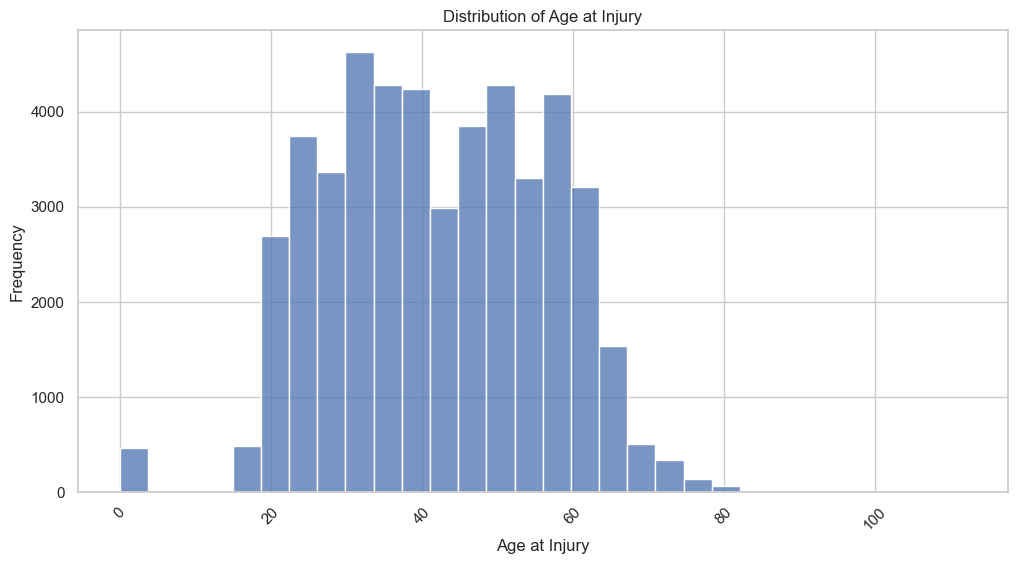

In [133]:
# distribution of average weekly wage

df_sample = df.sample(50000)
plt.figure(figsize=(12, 6))
sns.histplot(df_sample['Age at Injury'], bins=30)
plt.xticks(rotation=45)
plt.title('Distribution of Age at Injury')
plt.xlabel('Age at Injury')
plt.ylabel('Frequency')
plt.show()


In [134]:
C_o_In_indicators

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
1.0,CHEMICALS
2.0,HOT OBJECTS OR SUBSTANCES
3.0,TEMPERATURE EXTREMES
4.0,FIRE OR FLAME
5.0,STEAM OR HOT FLUIDS
...,...
96.0,TERRORISM
97.0,REPETITIVE MOTION
98.0,"CUMULATIVE, NOC"


* Now we can drop the columns with the descriptions and keep only the codes

* OIICS Nature of Injury Description does has zero values so we drop it too --> obtain information from website:

Create a visualization of the distribution of categorical variables 

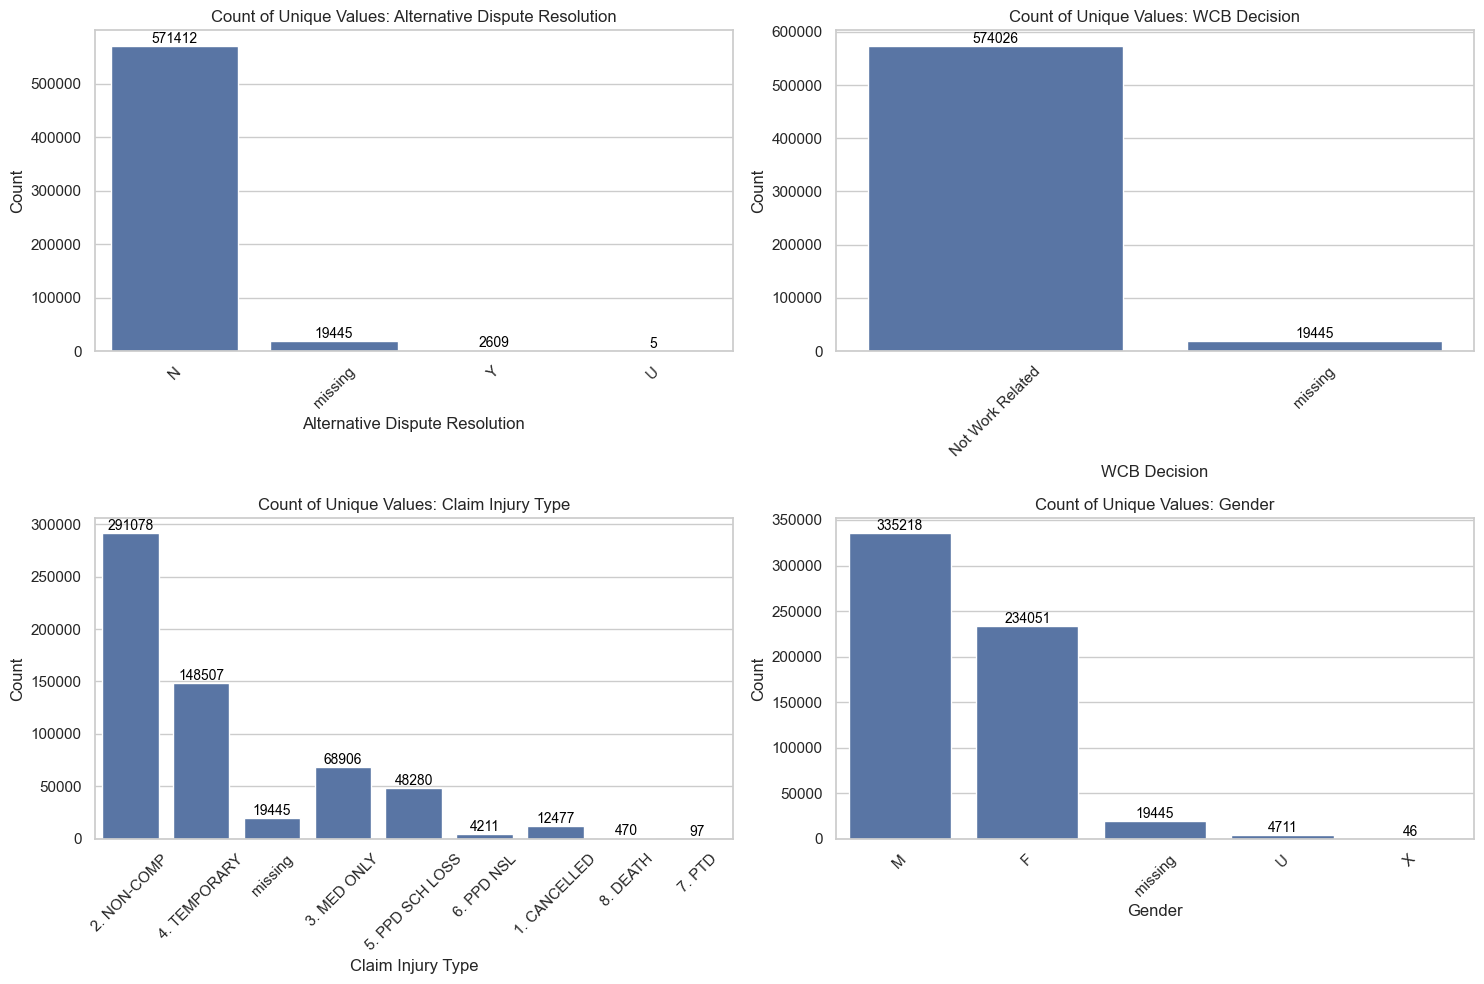

In [135]:
# Selecting the relevant columns for visualization
columns_to_plot = ['Alternative Dispute Resolution', 'WCB Decision', 'Claim Injury Type', 'Gender']


# Create a copy of the dataframe and fill the missing values to be able to plot the data
df_na = df.copy()
df_na = df_na[columns_to_plot].fillna("missing")

# Setting a Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ensure axes is a flat array if it's a 2D array
axes = axes.flatten()


# Plotting bar plots for each column
for i, col in enumerate(columns_to_plot):

    sns.countplot(x= df_na[col], ax=axes[i], legend=False)
    axes[i].set_title(f"Count of Unique Values: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    # rotate the x-axis labels to 45 degress
    axes[i].tick_params(axis='x', rotation=45)
    # write the count of each bar on top of the bar and set the y-coordinate just above the bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='bottom', 
                     color='black', 
                     size=10)
    
    plt.title(f"Count of Unique Values: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# delete the copy again
del df_na


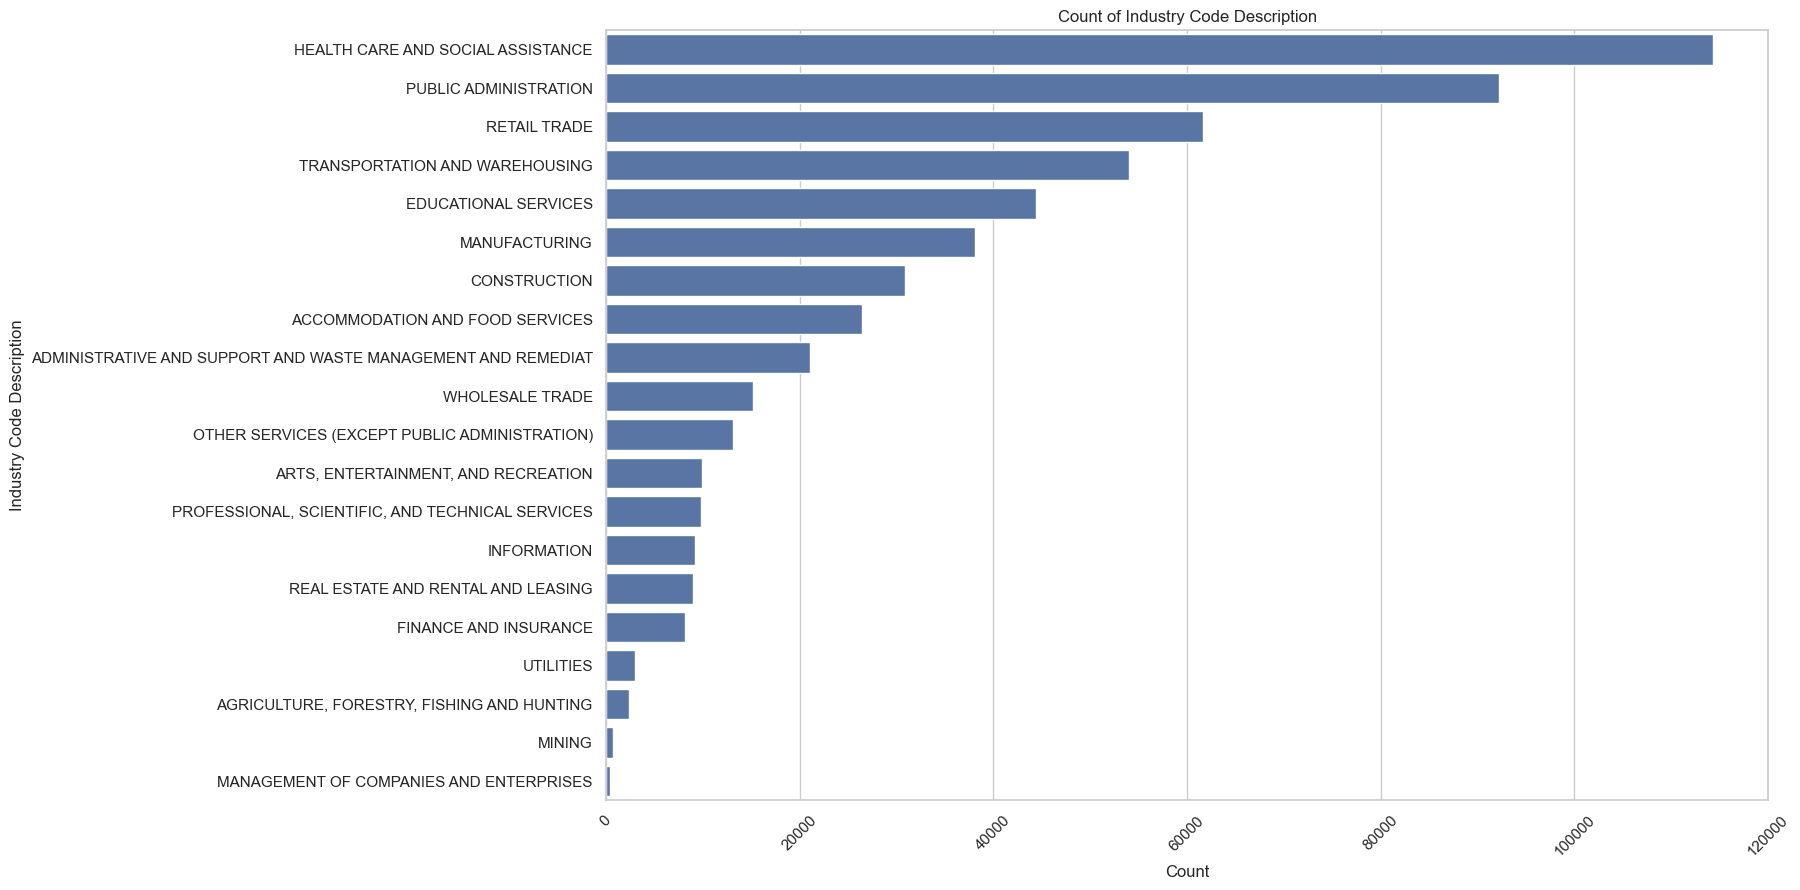

In [136]:
# create a barplot for the WCIO Cause of Injury Code
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.countplot(y='Industry Code Description', data=df, order = df['Industry Code Description'].value_counts().index)
# rotate the x-axis labels to 45 degress

plt.xticks(rotation=45)
plt.title('Count of Industry Code Description')
plt.xlabel('Count')
plt.ylabel('Industry Code Description')
plt.show()

Drop Description columns

In [137]:
# check if we already dropped the columns
if [col for col in df.columns if 'Description' in col]:
    descr_col = [col for col in df.columns if 'Description' in col]


print("columns with description that we are going to drop: \n", descr_col)

# drop the columns with description | if statement to check if the columns are in the df or if we already dropped them
if any(col in df.columns for col in descr_col):
    df.drop(descr_col, axis=1, inplace = True)
    print("columns dropped successfully")
else:
    print("columns are already dropped")

columns with description that we are going to drop: 
 ['Industry Code Description', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description']
columns dropped successfully


Age of individuals

* If Age at Injury is missing then Birth Year is missing 
* We can drop Birth Year --> Reduntant to have the information two times

In [138]:
# # Age at Injury 
# # Birth Year 
# print('missing values of Age at Injury: ', df['Age at Injury'].isna().sum()), '\n', misisng values of Birth Year that are not in Age at Injury: ', df[df['Age at Injury'].isna()]['Birth Year'].isna().sum()
# df[df['Age at Injury'].isna()]['Birth Year'].isna().sum()


# # drop Birth Year column 
# df.drop(columns= 'Birth Year', inplace = True)

In [139]:
# # create a barplot for the WCIO Cause of Injury Code
# plt.figure(figsize=(15, 15))
# sns.countplot(y='WCIO Cause of Injury Description', data=df, order = df['WCIO Cause of Injury Description'].value_counts().index)
# sns.set_theme(style="whitegrid")
# # sns.xticks(rotation=45)
# plt.title('Count of WCIO Cause of Injury Description')
# plt.xlabel('Count')
# plt.ylabel('WCIO Cause of Injury Code')
# plt.show()


In [140]:
df  

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,NaN,44.0,I,27.0,10.0,62.0,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,4.0,23.0,I,97.0,49.0,38.0,14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,NaN,56.0,II,79.0,7.0,10.0,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,NaN,62.0,II,16.0,43.0,36.0,12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,NaN,48.0,I,25.0,90.0,-9.0,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
# create a barplot for the WCIO Cause of Injury Code
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.countplot(y='Industry Code Description', data=df, order = df['Industry Code Description'].value_counts().index)
# rotate the x-axis labels to 45 degress

plt.xticks(rotation=45)
plt.title('Count of Industry Code Description')
plt.xlabel('Count')
plt.ylabel('Industry Code Description')
plt.show()

KeyError: 'Industry Code Description'

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# # For every industry code description we want to know the most common WCIO Cause of Injury Description
# # Group by Industry Code Description and WCIO Cause of Injury Description and count the number of occurences

# df_grouped = df.groupby(['Industry Code Description', 'WCIO Cause of Injury Description']).size().reset_index(name='Count')
# # # Sort the values by Industry Code Description and Count
# df_grouped = df_grouped.sort_values(by=['Industry Code Description', 'Count'], ascending=False)
# # Get the first row for each Industry Code Description
# df_grouped = df_grouped.groupby('Industry Code Description').first().reset_index()
# # Sort the values by Count
# df_grouped = df_grouped.sort_values(by='Count', ascending=False)
# df_grouped


In [ ]:


# # create a pivot table and count for ecery industry the WCIO Cause of Injury Description 



# pivot = df.pivot_table(index='Industry Code Description', columns='WCIO Cause of Injury Description', values='Claim Identifier', aggfunc='count')
# pivot



In [ ]:
# # check if Age at injury is really a float 
# print('unique values Age at Injury: , \n', df['Age at Injury'].unique(), '\n')

# # use Birth Year to calculate the age at injury
# df['Age at Injury'] = df['Injury Date'].str.split('/').str[-1].astype(int) - df['Birth Year']

<a id='univariate-analysis'></a>
### 3.4 Univariate Analysis

- Visualize the distribution of individual features using histograms, box plots, etc.
- Interpret the visualizations and note any observations.


In [ ]:
# Histograms and box plots for numerical features
# for col in numerical_columns:
#     sns.histplot(df[col])
#     plt.show()
#     sns.boxplot(x=df[col])
#     plt.show()

<a id='multivariate-analysis'></a>
### 3.5 Multivariate Analysis

- Analyze relationships between pairs of variables using scatter plots, heatmaps, etc.
- Investigate correlations and potential interactions between features.


In [ ]:
# Correlation matrix
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

# Pair plots
# sns.pairplot(df)
# plt.show()

<a id='data-cleaning-and-pre-processing'></a>
## Data Cleaning and Pre-processing


<a id='handling-missing-values'></a>
### 4.1 Handling Missing Values

- Identify features with missing values.
- Discuss different strategies to handle missing data (deletion, imputation, etc.).
- Justify the chosen method and apply it.


Create a visualization of the distribution of categorical variables 

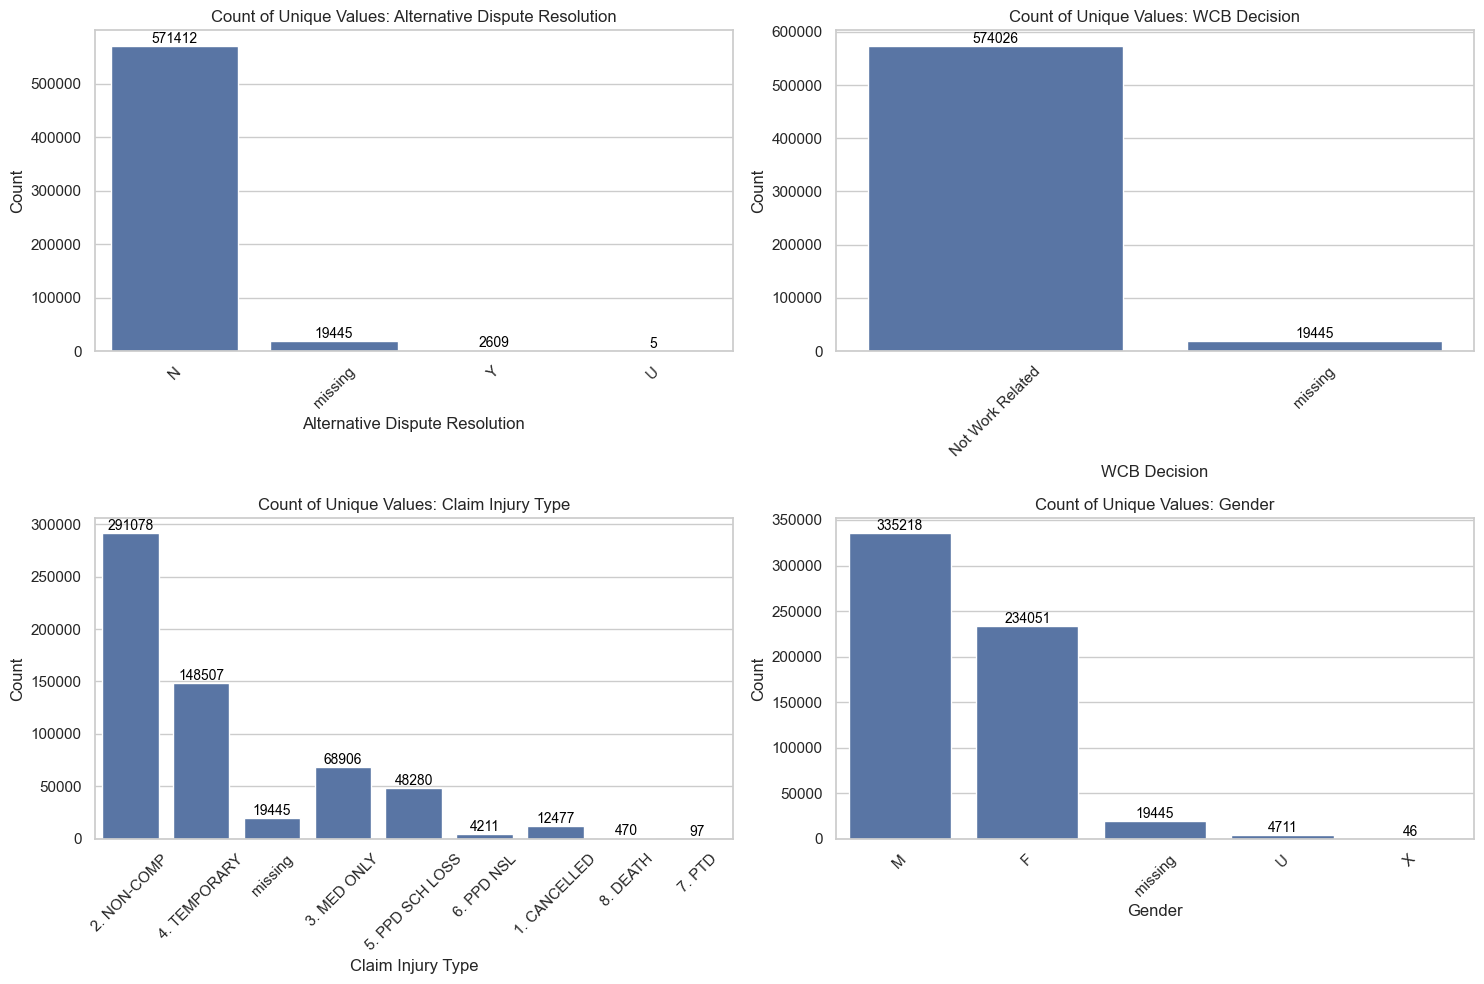

In [ ]:
# Selecting the relevant columns for visualization
columns_to_plot = ['Alternative Dispute Resolution', 'WCB Decision', 'Claim Injury Type', 'Gender']


# Create a copy of the dataframe and fill the missing values to be able to plot the data
df_na = df.copy()
df_na = df_na[columns_to_plot].fillna("missing")

# Setting a Seaborn style for better aesthetics
sns.set_theme(style="whitegrid")
# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Ensure axes is a flat array if it's a 2D array
axes = axes.flatten()


# Plotting bar plots for each column
for i, col in enumerate(columns_to_plot):

    sns.countplot(x= df_na[col], ax=axes[i], legend=False)
    axes[i].set_title(f"Count of Unique Values: {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    # rotate the x-axis labels to 45 degress
    axes[i].tick_params(axis='x', rotation=45)
    # write the count of each bar on top of the bar and set the y-coordinate just above the bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', 
                     va='bottom', 
                     color='black', 
                     size=10)
    
    plt.title(f"Count of Unique Values: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# delete the copy again
del df_na


In [ ]:
# from object to datetime for the following columns
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'])
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'])
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'])
df['First Hearing Date'] = pd.to_datetime(df['First Hearing Date'])

In [ ]:
# check for index duplicates
dubles = df["Claim Identifier"].value_counts()
dubles = dubles[dubles > 1]
dubles = dubles.index 
dubles


duplicates = df[df.duplicated(subset=['Claim Identifier'], keep="first")]
df = df.drop(duplicates.index)

Removing Rows with NaNs > 70%

In [ ]:
# set threshold to 70% of the columns
threshold = int(df.shape[1] * 0.7)
# Find rows with 70% or more NaN values
rows_with_70_percent_nans = df[df.isnull().sum(axis=1) >= threshold]
# Count the number of rows with 70% or more NaN values
num_rows = rows_with_70_percent_nans.shape[0]

# Print the number of rows with 70% or more NaN values
print(f'There are {num_rows} rows with 70% or more NaN values which we will drop.')
# Drop rows with 70% or more NaN values
df= df.dropna(thresh=df.shape[1] - threshold)

There are 19444 rows with 70% or more NaN values which we will drop.


In [ ]:
# Identify missing values
# df.isnull().sum()

# Handle missing values
# Example: df.dropna() or df.fillna(method='ffill')

<a id='outlier-detection-and-treatment'></a>
### 4.2 Outlier Detection and Treatment

- Use statistical methods to detect outliers.
- Visualize outliers using box plots or scatter plots.
- Decide on an approach to handle outliers (removal, transformation, etc.).
- Justify your decisions.


In [ ]:
# Detect outliers
# for col in numerical_columns:
#     sns.boxplot(x=df[col])
#     plt.show()

# Handle outliers
# Example: Remove or cap outliers

<a id='dealing-with-categorical-variables'></a>
### 4.3 Dealing with Categorical Variables

- Identify categorical features in the dataset.
- Discuss encoding techniques (one-hot encoding, label encoding, etc.).
- Apply the chosen encoding method to transform categorical variables.


**Binary Variables:**
- Alternative Dispute Resolution
- COVID-19 Indicator 
- Attorney/Representative
- Gender

**Low Cardinality (less than 10 unique values):**
- Carrier Type (lets handle this feature with Carrier Name) --> Drop carrier name. This should not be relevant 

**Multiple values more than 10:**
- Industry code
- WCIO Cause of Inj Code
- WCIO Nature of Inj Code
- WCIO Part of Body Code

In [ ]:
# Get categorical variables
cat_variables = ['Alternative Dispute Resolution',
'Attorney/Representative',
'Carrier Name',
'Carrier Type',
# 'County of Injury', # drop because represents location
'COVID-19 Indicator',
# 'District Name', # drop because represents location
'Gender',
'Industry Code',
# 'Medical Fee Region', # drop because represents location
'WCIO Cause of Injury Code',
'WCIO Nature of Injury Code',
'WCIO Part Of Body Code',
# 'Zip Code', # drop because represents location
'Agreement Reached']

# create copy of the df with the cat variables
df_cat = df[cat_variables].copy()

df_cat.head()

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,COVID-19 Indicator,Gender,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached
0,N,N,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,N,M,44.0,27.0,10.0,62.0,0.0
1,N,Y,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,N,F,23.0,97.0,49.0,38.0,1.0
2,N,N,INDEMNITY INSURANCE CO OF,1A. PRIVATE,N,M,56.0,79.0,7.0,10.0,0.0
4,N,N,STATE INSURANCE FUND,2A. SIF,N,M,62.0,16.0,43.0,36.0,0.0
5,N,N,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,N,M,44.0,31.0,10.0,38.0,0.0


In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574026 entries, 0 to 593467
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  574026 non-null  object 
 1   Attorney/Representative         574026 non-null  object 
 2   Carrier Name                    574026 non-null  object 
 3   Carrier Type                    574026 non-null  object 
 4   COVID-19 Indicator              574026 non-null  object 
 5   Gender                          574026 non-null  object 
 6   Industry Code                   564068 non-null  float64
 7   WCIO Cause of Injury Code       558386 non-null  float64
 8   WCIO Nature of Injury Code      558369 non-null  float64
 9   WCIO Part Of Body Code          556944 non-null  float64
 10  Agreement Reached               574026 non-null  float64
dtypes: float64(5), object(6)
memory usage: 52.6+ MB


#### 4.3.1 Encoding Binary Variables

In [ ]:
# show the unique values for binary columns and how often the appear

cat_variables_binary = ['Alternative Dispute Resolution', 'COVID-19 Indicator', 'Attorney/Representative', 'Gender']

for value in cat_variables_binary:
    print(f'Unique values for {value}:')
    print(df_cat[value].value_counts(dropna= False), '\n')
# binary_cat_df.groupby(cat_variables_binary).count()


# cat_variables[cat_variables_binary].groupby(cat_variables_binary).count()

Unique values for Alternative Dispute Resolution:
Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64 

Unique values for COVID-19 Indicator:
COVID-19 Indicator
N    546505
Y     27521
Name: count, dtype: int64 

Unique values for Attorney/Representative:
Attorney/Representative
N    392291
Y    181735
Name: count, dtype: int64 

Unique values for Gender:
Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64 



lets drop rows where gender is X. Inpute them with Unknown

In [ ]:
df_cat['Gender'] =  df_cat['Gender'].where(df_cat['Gender'] != 'X','U' )

There are values with U in the Alternative Dispute Resolution (only for 5 values). Lets drop these for now


In [38]:
# drop rows where alternative dispute resolution == "U"
df_cat = df_cat[df_cat['Alternative Dispute Resolution'] != 'U']

In [39]:
# Define the binary variables and mapping
binary_vars = ['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']
binary_mapping = {'Y': 1, 'N': 0}

# Apply mapping to binary variables
for var in binary_vars:
    df_cat[var] = df_cat[var].map(binary_mapping)

# convert all columns into int values
# df_cat[binary_vars] = df_cat[binary_vars].astype(int)


df_cat.head()

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,COVID-19 Indicator,Gender,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached
0,0,0,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,0,M,44.0,27.0,10.0,62.0,0.0
1,0,1,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,0,F,23.0,97.0,49.0,38.0,1.0
2,0,0,INDEMNITY INSURANCE CO OF,1A. PRIVATE,0,M,56.0,79.0,7.0,10.0,0.0
4,0,0,STATE INSURANCE FUND,2A. SIF,0,M,62.0,16.0,43.0,36.0,0.0
5,0,0,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,0,M,44.0,31.0,10.0,38.0,0.0


In [40]:
# # show the unique values for the binary values 
# for col in binary_vars:
#     print(f'Unique values for {col}: {df_cat[col].unique()}')


cat_variables_binary = ['Alternative Dispute Resolution', 'COVID-19 Indicator', 'Agreement Reached', 'Attorney/Representative']

for value in cat_variables_binary:
    print(f'Unique values for {value}:')
    print(df_cat[value].value_counts(dropna= False), '\n')

# This matches the values from above


Unique values for Alternative Dispute Resolution:
Alternative Dispute Resolution
0    571412
1      2609
Name: count, dtype: int64 

Unique values for COVID-19 Indicator:
COVID-19 Indicator
0    546500
1     27521
Name: count, dtype: int64 

Unique values for Agreement Reached:
Agreement Reached
0.0    547234
1.0     26787
Name: count, dtype: int64 

Unique values for Attorney/Representative:
Attorney/Representative
0    392287
1    181734
Name: count, dtype: int64 



#### 4.3.2 Encoding Carrier Type

We currently have several carrier types and names that are not usefull for the model.
We need a way to preprocess them and convert them into a format that the model can understand.

In [43]:
df_cat

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,COVID-19 Indicator,Gender,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached
0,0,0,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,0,M,44.0,27.0,10.0,62.0,0.0
1,0,1,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,0,F,23.0,97.0,49.0,38.0,1.0
2,0,0,INDEMNITY INSURANCE CO OF,1A. PRIVATE,0,M,56.0,79.0,7.0,10.0,0.0
4,0,0,STATE INSURANCE FUND,2A. SIF,0,M,62.0,16.0,43.0,36.0,0.0
5,0,0,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,0,M,44.0,31.0,10.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
593451,0,0,STATE INSURANCE FUND,2A. SIF,0,M,56.0,45.0,10.0,42.0,0.0
593455,0,0,WESCO INSURANCE CO,1A. PRIVATE,0,M,62.0,74.0,37.0,35.0,0.0
593456,0,0,SECURITY NATIONAL INSURANCE CO,1A. PRIVATE,0,F,62.0,98.0,80.0,34.0,0.0
593457,0,0,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,0,F,62.0,59.0,59.0,55.0,0.0


In [47]:
df_cat['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52783
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [ ]:
# Step 1: Define the mapping
carrier_type_mapping = {
    '1A. PRIVATE': 'Private Insurance Carrier',
    '2A. SIF': 'State Insurance Fund',
    '3A. SELF PUBLIC': 'Self-insured Public Entity',
    '4A. SELF PRIVATE': 'Self-insured Private Entity',
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'Special Funds',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'Special Funds',
    '5D. SPECIAL FUND - UNKNOWN': 'Special Funds',
    'UNKNOWN': 'Unknown'
}

# Step 2: Apply the mapping to create 'Carrier Group'
df_cat['Carrier Group'] = df_cat['Carrier Type'].map(carrier_type_mapping)
df_cat['Carrier Group'].fillna('Other', inplace=True)

# Step 3: Encode 'Carrier Group' using One-Hot Encoding
df_cat = pd.get_dummies(df_cat, columns=['Carrier Group'], prefix='CarrierGroup')

# Now, 'Carrier Type' has been grouped and encoded
df_cat.head()


/var/folders/nj/p20z0h9x3ssf6ll0_cdhh2yc0000gn/T/ipykernel_66757/140144503.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['Carrier Group'].fillna('Other', inplace=True)


,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,COVID-19 Indicator,Gender,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,CarrierGroup_Private Insurance Carrier,CarrierGroup_Self-insured Private Entity,CarrierGroup_Self-insured Public Entity,CarrierGroup_Special Funds,CarrierGroup_State Insurance Fund,CarrierGroup_Unknown
0,0,0,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,0,M,44.0,27.0,10.0,62.0,0.0,True,False,False,False,False,False
1,0,1,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,0,F,23.0,97.0,49.0,38.0,1.0,True,False,False,False,False,False
2,0,0,INDEMNITY INSURANCE CO OF,1A. PRIVATE,0,M,56.0,79.0,7.0,10.0,0.0,True,False,False,False,False,False
4,0,0,STATE INSURANCE FUND,2A. SIF,0,M,62.0,16.0,43.0,36.0,0.0,False,False,False,False,True,False
5,0,0,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,0,M,44.0,31.0,10.0,38.0,0.0,True,False,False,False,False,False


Carrier Name unique values:  2046 

Carrier Name distribution: Carrier Name
STATE INSURANCE FUND            111144
POLICE, FIRE, SANITATION         21602
AMERICAN ZURICH INSURANCE CO     17540
CHARTER OAK FIRE INS CO          17176
INDEMNITY INS. OF N AMERICA      14366
                                 ...  
LOWES HOME CENTERS INC               1
WEST BEND MUTUAL INSURANCE           1
LIVINGSTON-STEUBEN-                  1
NEW YORK MUTUAL CASUALTY             1
HERMON-DEKALB CENTRAL                1
Name: count, Length: 2046, dtype: int64


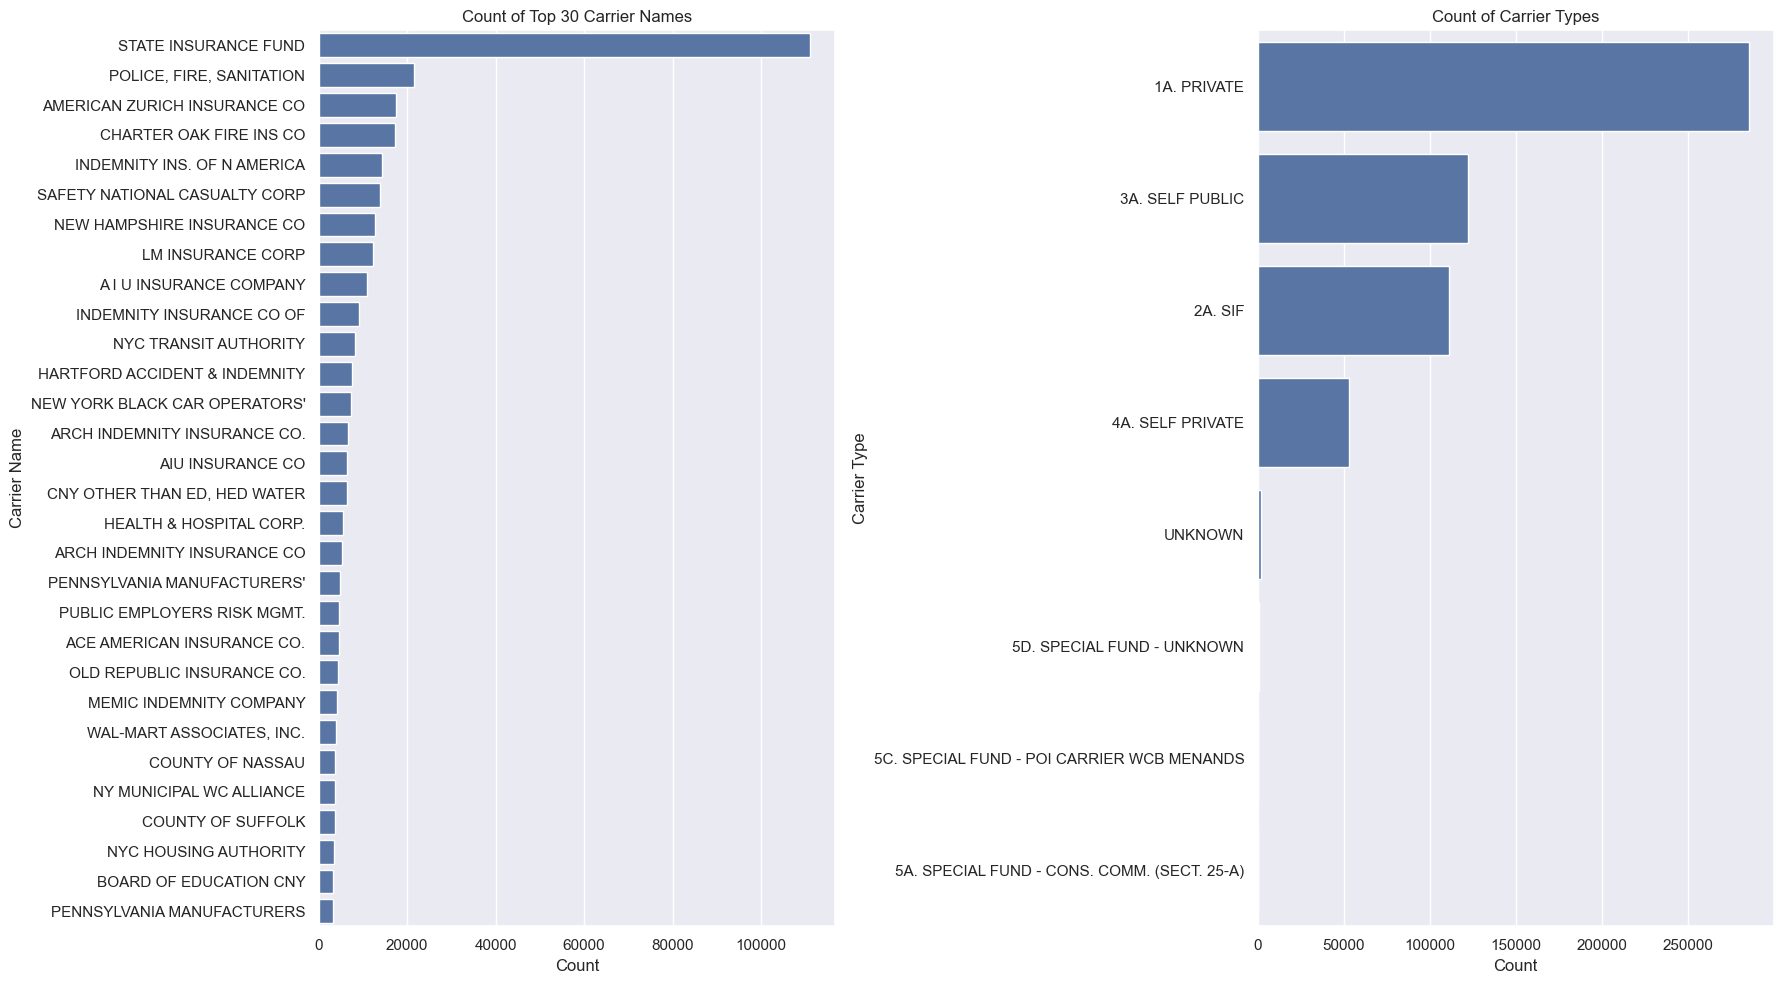

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Carrier Name unique values: ', df_cat['Carrier Name'].nunique(), '\n')
print('Carrier Name distribution:', df_cat['Carrier Name'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(18, 10))
sns.set_theme()

sns.countplot(
    y='Carrier Name',
    data=df_cat,
    order=df_cat['Carrier Name'].value_counts().index[:30],
    ax=axes[0]
)
axes[0].set_title('Count of Top 30 Carrier Names')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Carrier Name')

sns.countplot(
    y='Carrier Type',
    data=df_cat,
    order=df_cat['Carrier Type'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('Count of Carrier Types')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Carrier Type')

plt.tight_layout()
plt.show()

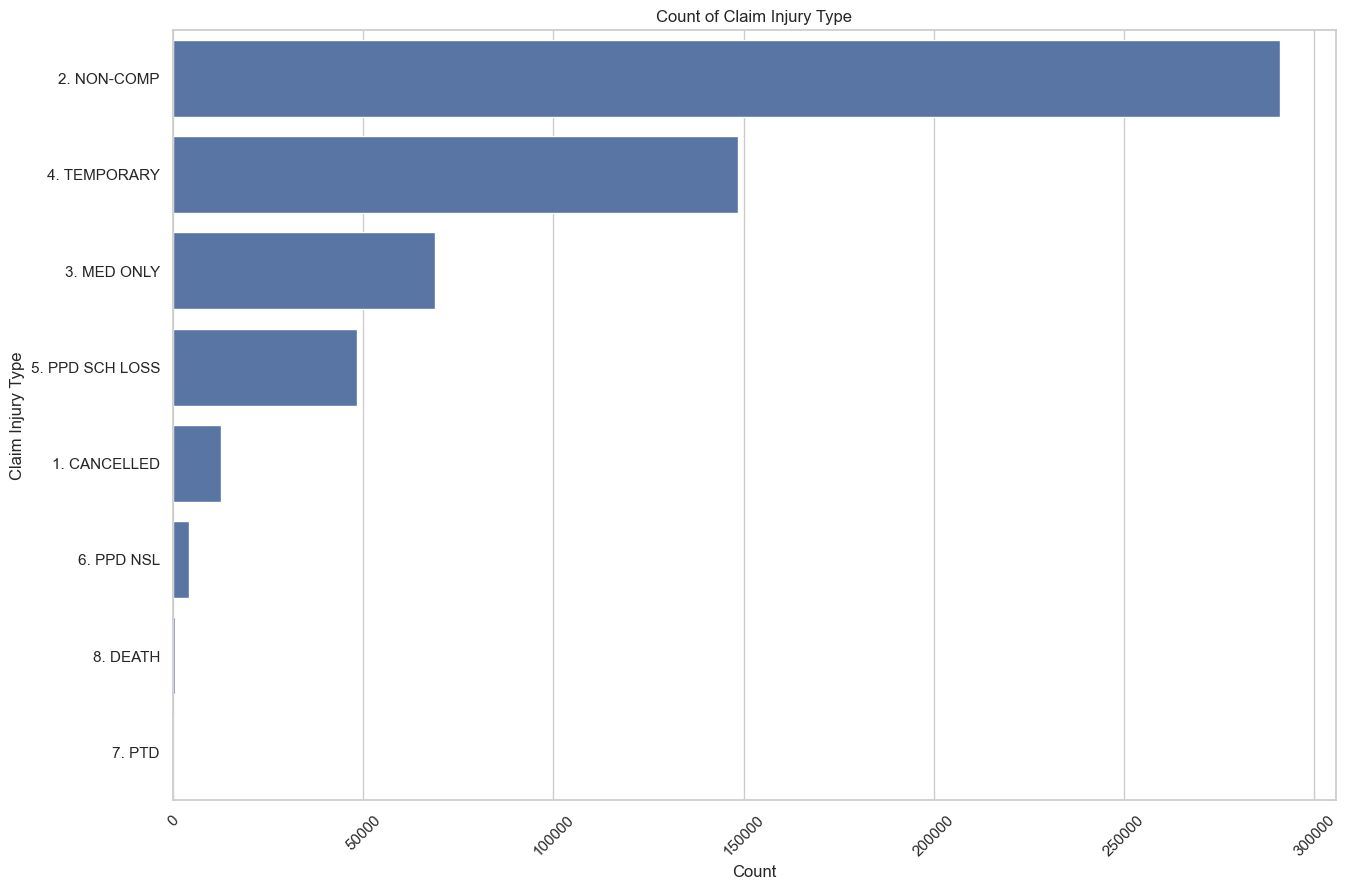

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y= 'Claim Injury Type', data=df, order = df['Claim Injury Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count of Claim Injury Type')
plt.xlabel('Count')
plt.ylabel('Claim Injury Type')
plt.show()

In [151]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,Beneficial Injury
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,44.0,I,27.0,10.0,62.0,13662,0.0,Not Work Related,1.0,0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,23.0,I,97.0,49.0,38.0,14569,1.0,Not Work Related,4.0,0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,56.0,II,79.0,7.0,10.0,12589,0.0,Not Work Related,6.0,0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,62.0,II,16.0,43.0,36.0,12603,0.0,Not Work Related,1.0,0


In [152]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [164]:
pd.DataFrame(df['Industry Code'].value_counts())

,count
Industry Code,
62.0,114339
92.0,92240
61.0,44393
44.0,43685
48.0,37319
23.0,30903
72.0,26456
56.0,21027
45.0,17953


In [178]:
# Claim Injuries that are connected to a outcome where person is compensated somehow
benef_inj = ['4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD']

# Create a new column 'Beneficial Injury' that is 1 if Claim Injury Type is in benef_inj, 0 otherwise
df['Beneficial Injury'] = df['Claim Injury Type'].isin(benef_inj).astype(int)

# Calculate the percentage of beneficial injuries for every Claim Injury Type, Industry Code
beneficial_injury_percentage = df.groupby(['Industry Code'])['Beneficial Injury'].sum().reset_index()

# calculate the percentage of beneficial injuries

# add the Industy Code Description to the df
beneficial_injury_percentage =  pd.merge(beneficial_injury_percentage, Ind_indicators, left_on='Industry Code', right_index=True).sort_values(by='Beneficial Injury', ascending=False)
beneficial_injury_percentage =  pd.merge(beneficial_injury_percentage, pd.DataFrame(df['Industry Code'].value_counts()), left_on = 'Industry Code', right_index=True)

beneficial_injury_percentage['Beneficial_injury_percentage'] = beneficial_injury_percentage['Beneficial Injury'] / beneficial_injury_percentage['count']

beneficial_injury_percentage.sort_values(by = 'Beneficial_injury_percentage', ascending= False)

,Industry Code,Beneficial Injury,Industry Code Description,count,Beneficial_injury_percentage
10,48.0,18002,TRANSPORTATION AND WAREHOUSING,37319,0.482382
3,23.0,14753,CONSTRUCTION,30903,0.477397
23,92.0,40240,PUBLIC ADMINISTRATION,92240,0.436253
2,22.0,1256,UTILITIES,2980,0.421477
12,51.0,3780,INFORMATION,9166,0.412394
7,42.0,6172,WHOLESALE TRADE,15236,0.405093
0,11.0,963,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",2404,0.400582
11,49.0,6604,TRANSPORTATION AND WAREHOUSING,16704,0.395354
1,21.0,270,MINING,695,0.388489
4,31.0,3895,MANUFACTURING,10114,0.385110


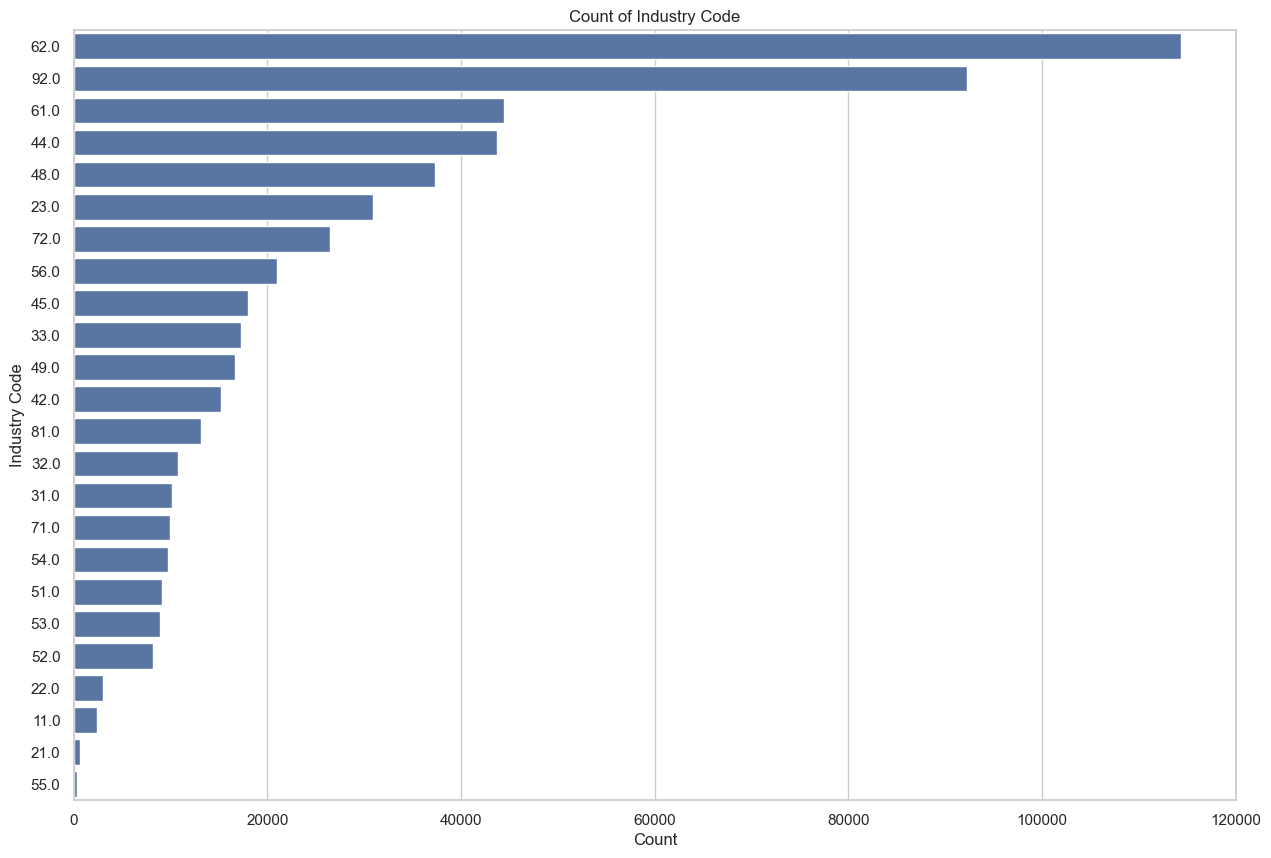

In [ ]:
# Industry decoding

# show the countplot for industry code 
plt.figure(figsize=(15, 10))
sns.countplot(y='Industry Code', data=df[df['WCB Decision']], order = df['Industry Code'].value_counts().index)
plt.title('Count of Industry Code')
plt.xlabel('Count')
plt.ylabel('Industry Code')
plt.show()


<a id='feature-engineering'></a>
### 4.4 Feature Engineering


<a id='feature-creation'></a>
#### 4.4.1 Feature Creation

- Explore the possibility of creating new features from existing ones.
- Describe the rationale behind new feature creation.
- Implement the new features.


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [ ]:
# Create new features

# Convert date columns to datetime for calculations
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')
df['C-2 Date'] = pd.to_datetime(df['C-2 Date'], errors='coerce')
df['C-3 Date'] = pd.to_datetime(df['C-3 Date'], errors='coerce')

# Feature 1: Claim Duration (in days) - Time between 'Accident Date' and 'Assembly Date'
df['Claim Duration'] = (df['Assembly Date'] - df['Accident Date']).dt.days

# Feature 2: Age at Accident Year
df['Accident Year'] = df['Accident Date'].dt.year
df['Age at Accident Year'] = df['Accident Year'] - df['Birth Year']

# Feature 3: Attorney Involvement (Binary transformation of 'Attorney/Representative')
df['Attorney Involved'] = df['Attorney/Representative'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature 4: Wage Categorization (Low, Medium, High)
df['Wage Category'] = pd.cut(df['Average Weekly Wage'], bins=[0, 500, 1000, float('inf')], labels=['Low', 'Medium', 'High'])

# Feature 5: Claim Filing Delay (in days) - Time between 'C-2 Date' and 'C-3 Date'
df['Claim Filing Delay'] = (df['C-3 Date'] - df['C-2 Date']).dt.days

# Display the new features
engineered_features = df[['Claim Duration', 'Age at Accident Year', 'Attorney Involved', 'Wage Category', 'Claim Filing Delay']].head()

import ace_tools as tools; tools.display_dataframe_to_user(name="Engineered Features", dataframe=engineered_features)

engineered_features


<a id='feature-transformation'></a>
#### 4.4.2 Feature Transformation

- Apply transformations to features if necessary (e.g., log transformation).
- Explain the reasoning for transforming features.


In [ ]:
# Transform features
# Example: df['transformed_feature'] = np.log(df['feature'])

<a id='data-scaling-and-normalization'></a>
### 4.5 Data Scaling and Normalization

- Discuss the importance of feature scaling.
- Choose appropriate scaling methods (StandardScaler, MinMaxScaler, etc.).
- Apply scaling to the dataset.
- Explain how scaling affects the model performance.


In [ ]:
# Scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

<a id='feature-selection'></a>
## Feature Selection


<a id='feature-importance-analysis'></a>
### 5.1 Feature Importance Analysis

- Use methods like feature importance from tree-based models to assess feature relevance.
- Present the results and interpret them.


In [ ]:
# Feature importance using Random Forest
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
# feature_importances = model.feature_importances_

<a id='correlation-matrix'></a>
### 5.2 Correlation Matrix

- Create a correlation matrix to identify highly correlated features.
- Discuss potential issues with multicollinearity.


In [ ]:
# Correlation matrix
# corr_matrix = pd.DataFrame(df_scaled).corr()
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

<a id='dimensionality-reduction-techniques'></a>
### 5.3 Dimensionality Reduction Techniques

- Consider techniques like PCA if applicable.
- Explain the benefits and drawbacks of dimensionality reduction.


In [ ]:
# Apply PCA
# from sklearn.decomposition import PCA
# pca = PCA(n_components=number_of_components)
# df_pca = pca.fit_transform(df_scaled)

<a id='final-feature-selection'></a>
### 5.4 Final Feature Selection

- Define a clear strategy for selecting the final set of features.
- Justify the selection based on the analysis.
- Prepare the dataset with the selected features for modeling.


In [ ]:
# Select final features
# selected_features = ['feature1', 'feature2', 'feature3']
# X = df[selected_features]
# y = df['target']

<a id='model-building'></a>
## Model Building


<a id='problem-type-identification'></a>
### 6.1 Problem Type Identification

- Confirm that the task is a classification problem.
- Discuss the nature of the target variable (binary, multiclass).


<a id='algorithm-selection'></a>
### 6.2 Algorithm Selection

- List potential algorithms suitable for the problem (e.g., Logistic Regression, Decision Trees).
- Justify the choice of algorithms to be used.


In [ ]:
# List of algorithms
# algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

<a id='model-training'></a>
### 6.3 Model Training

- Split the dataset into training and validation sets.
- Train the selected models using the training data.
- Provide details on model parameters and settings.


In [ ]:
# Split the dataset
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
# Example with Logistic Regression:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(X_train, y_train)

<a id='cross-validation'></a>
### 6.4 Cross-Validation

- Explain the purpose of cross-validation.
- Implement cross-validation techniques (e.g., k-fold CV).
- Record cross-validation results.


In [ ]:
# Cross-validation
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# print(cv_scores)

<a id='performance-metrics'></a>
### 6.5 Performance Metrics

- Choose appropriate evaluation metrics (accuracy, precision, recall, F1-score, ROC-AUC).
- Justify the choice of metrics based on the problem context.


In [ ]:
# Evaluate model
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# y_pred = model.predict(X_val)
# print('Accuracy:', accuracy_score(y_val, y_pred))
# print('Precision:', precision_score(y_val, y_pred))
# print('Recall:', recall_score(y_val, y_pred))
# print('F1 Score:', f1_score(y_val, y_pred))

<a id='model-evaluation'></a>
### 6.6 Model Evaluation

- Evaluate the model performance using the selected metrics.
- Compare results between different models.
- Discuss any observations or insights.


<a id='prediction-on-test-set'></a>
## Prediction on Test Set


<a id='generating-predictions'></a>
### 7.1 Generating Predictions

- Use the trained model to make predictions on the test dataset.
- Explain any pre-processing steps needed for the test data.


In [ ]:
# Predict on test set
# test_data = pd.read_csv('test_dataset.csv')
# Apply same pre-processing steps to test_data
# predictions = model.predict(test_data)

<a id='result-interpretation'></a>
### 7.2 Result Interpretation

- Interpret the prediction results.
- Discuss potential implications or actions based on the predictions.


<a id='conclusion'></a>
## Conclusion

- Summarize the key findings from the analysis.
- Reflect on the model's performance and potential improvements.
- Suggest next steps or recommendations.


<a id='references'></a>
## References

- List any resources, articles, or papers referenced during the analysis.


<a id='appendices'></a>
## Appendices

- Include any additional tables, figures, or code snippets that support the analysis.
